# Problem Statement
Predicting turbine energy yield (TEY) using ambient variables and process variable as features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
# Read file
gt1=pd.read_csv('gt_2011.csv')
gt2=pd.read_csv('gt_2012.csv')
gt3=pd.read_csv('gt_2013.csv')
gt4=pd.read_csv('gt_2014.csv')
gt5=pd.read_csv('gt_2015.csv')

In [3]:
# The given data of 5 year has 5 different file thus we concat 5 year data for Predicting turbine energy yield (TEY).
Data=pd.concat([gt1,gt2,gt3,gt4,gt5],axis=0)

In [4]:
df=Data.copy()

In [5]:
df.size

404063

In [6]:
df.shape

(36733, 11)

In [7]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [8]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
7383,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


#### Ambient variables as features
1. Ambient temperature (AT) C
2. Ambient pressure (AP) mbar
3. Ambient humidity (AH) (%)
4. Air filter difference pressure (AFDP) mbar
5. Gas turbine exhaust pressure (GTEP) mbar
6. Turbine inlet temperature (TIT) C 
7. Turbine after temperature (TAT) C 
8. Compressor discharge pressure (CDP) mbar 
9. Turbine energy yield (TEY) MWH 
10. Carbon monoxide (CO) mg/m3 
11. Nitrogen oxides (NOx) mg/m3 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


The dataset contains 36733 instances of 11 features as sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The features of dataset hae float Datatype. The data comes from the same power plant as the dataset used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Note that the dates are not given in the instances but the data are sorted in chronological order. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.

In [10]:
# Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Deal with missing data
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

### Univariate Analysis

In [11]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


The features are not on the same scale. For example AP has a mean of 1013.07 and CO has a mean value of 2.37. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

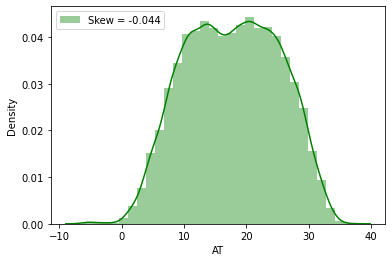

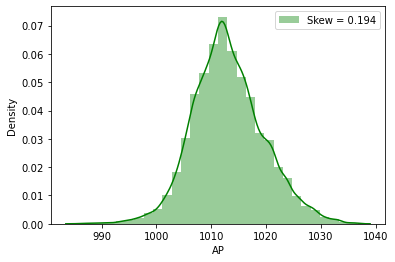

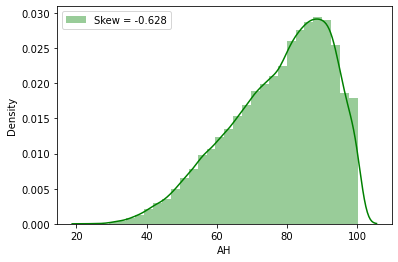

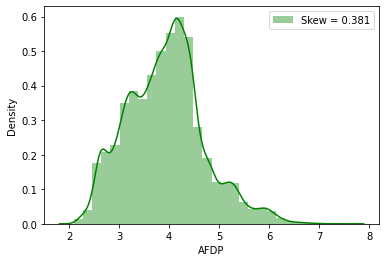

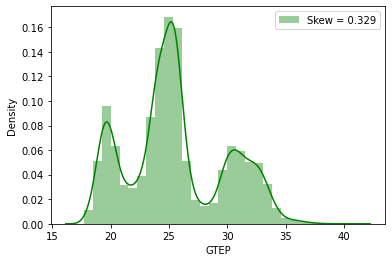

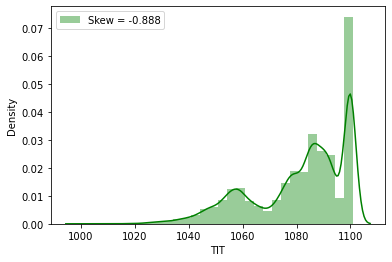

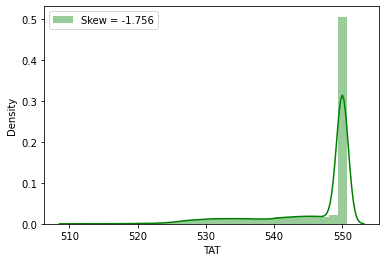

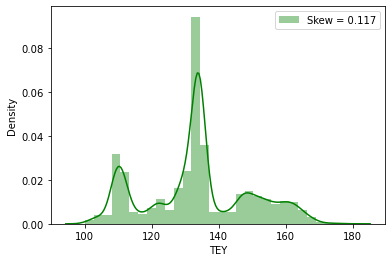

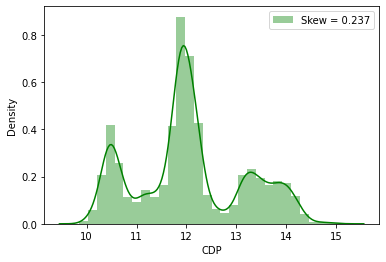

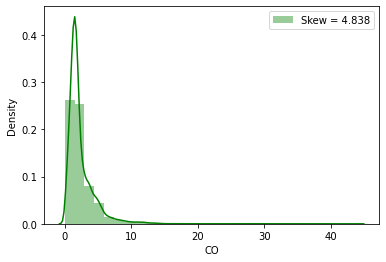

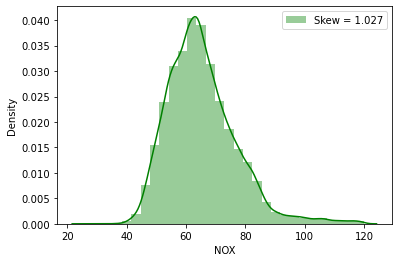

In [12]:
a=[cols for cols in df.columns if df[cols].dtypes != 'O']
for i in a:
    skew = df[i].skew()
    sns.distplot(df[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
    plt.legend(loc='best')
    plt.show();

Some of the features are normally distributed. The features AH, CO, TIT and TAT exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers. 

##### Histogram of the Target Column

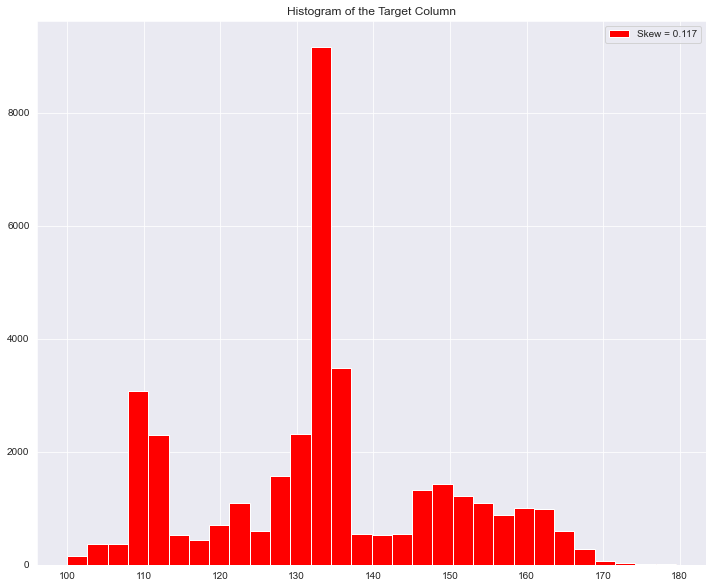

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
skew = df['TEY'].skew()
plt.hist(data=df,x="TEY",color="red",bins=30,label='Skew = %.3f'%(skew))
plt.legend(loc='best')
plt.title("Histogram of the Target Column");

Unsurprisingly, Mostly none of the features are on the same scale as we already saw in the previous section.

### Multivariate Analysis

In [14]:
# correlation
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326,-0.558174
AP,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050,0.191938
AH,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.106586,0.164617
AFDP,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425,-0.188247
GTEP,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909,-0.201630
TIT,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275,-0.213865
TAT,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353,-0.092791
TEY,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813,-0.116127
CDP,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027,-0.171256
CO,-0.174326,0.067050,0.106586,-0.448425,-0.518909,-0.706275,0.058353,-0.569813,-0.551027,1.000000,0.340606


In [15]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988778
GTEP    0.964127
TIT     0.910297
AFDP    0.665483
AP      0.118224
AT     -0.091152
NOX    -0.116127
AH     -0.137360
CO     -0.569813
TAT    -0.682396
Name: TEY, dtype: float64

##### Pearson's Correlation Coefficient: 
Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)


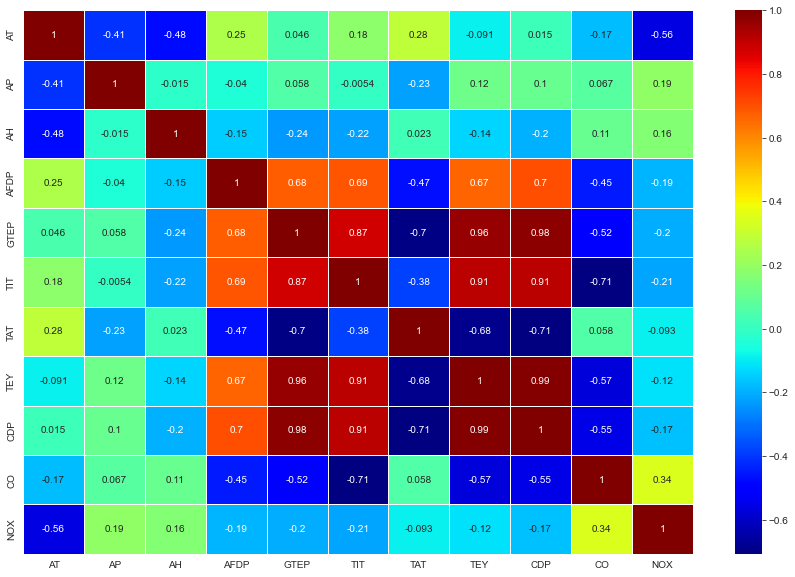

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white');

Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

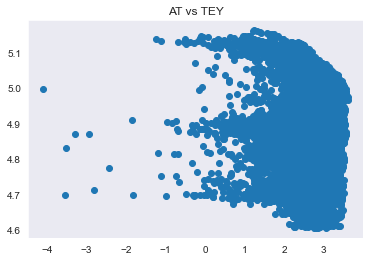

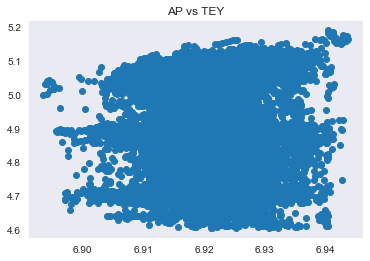

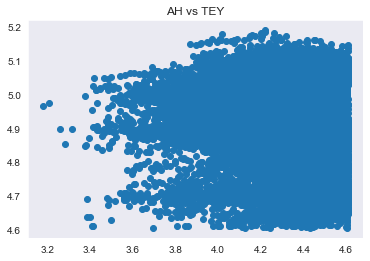

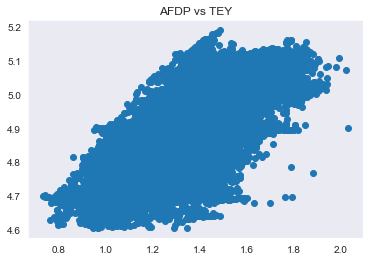

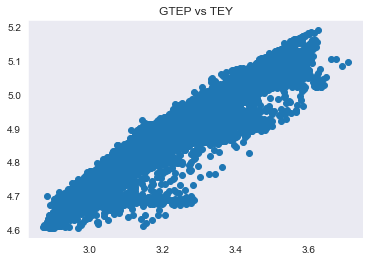

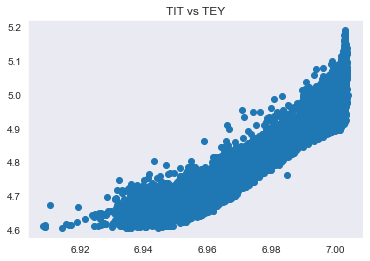

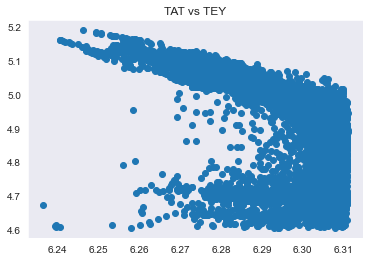

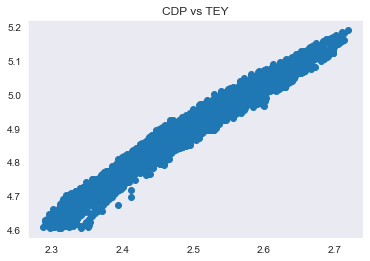

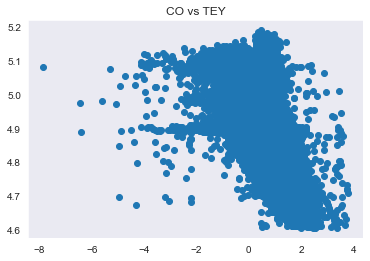

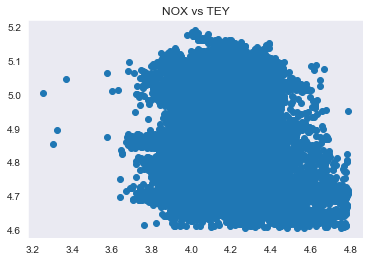

In [17]:
for a in df.columns:
    if a!="TEY": 
        plt.scatter(np.log(df[a]), np.log(df['TEY']))
        plt.title(a+ ' vs TEY')
        plt.grid()
        plt.show();

ValueError: cannot reindex on an axis with duplicate labels

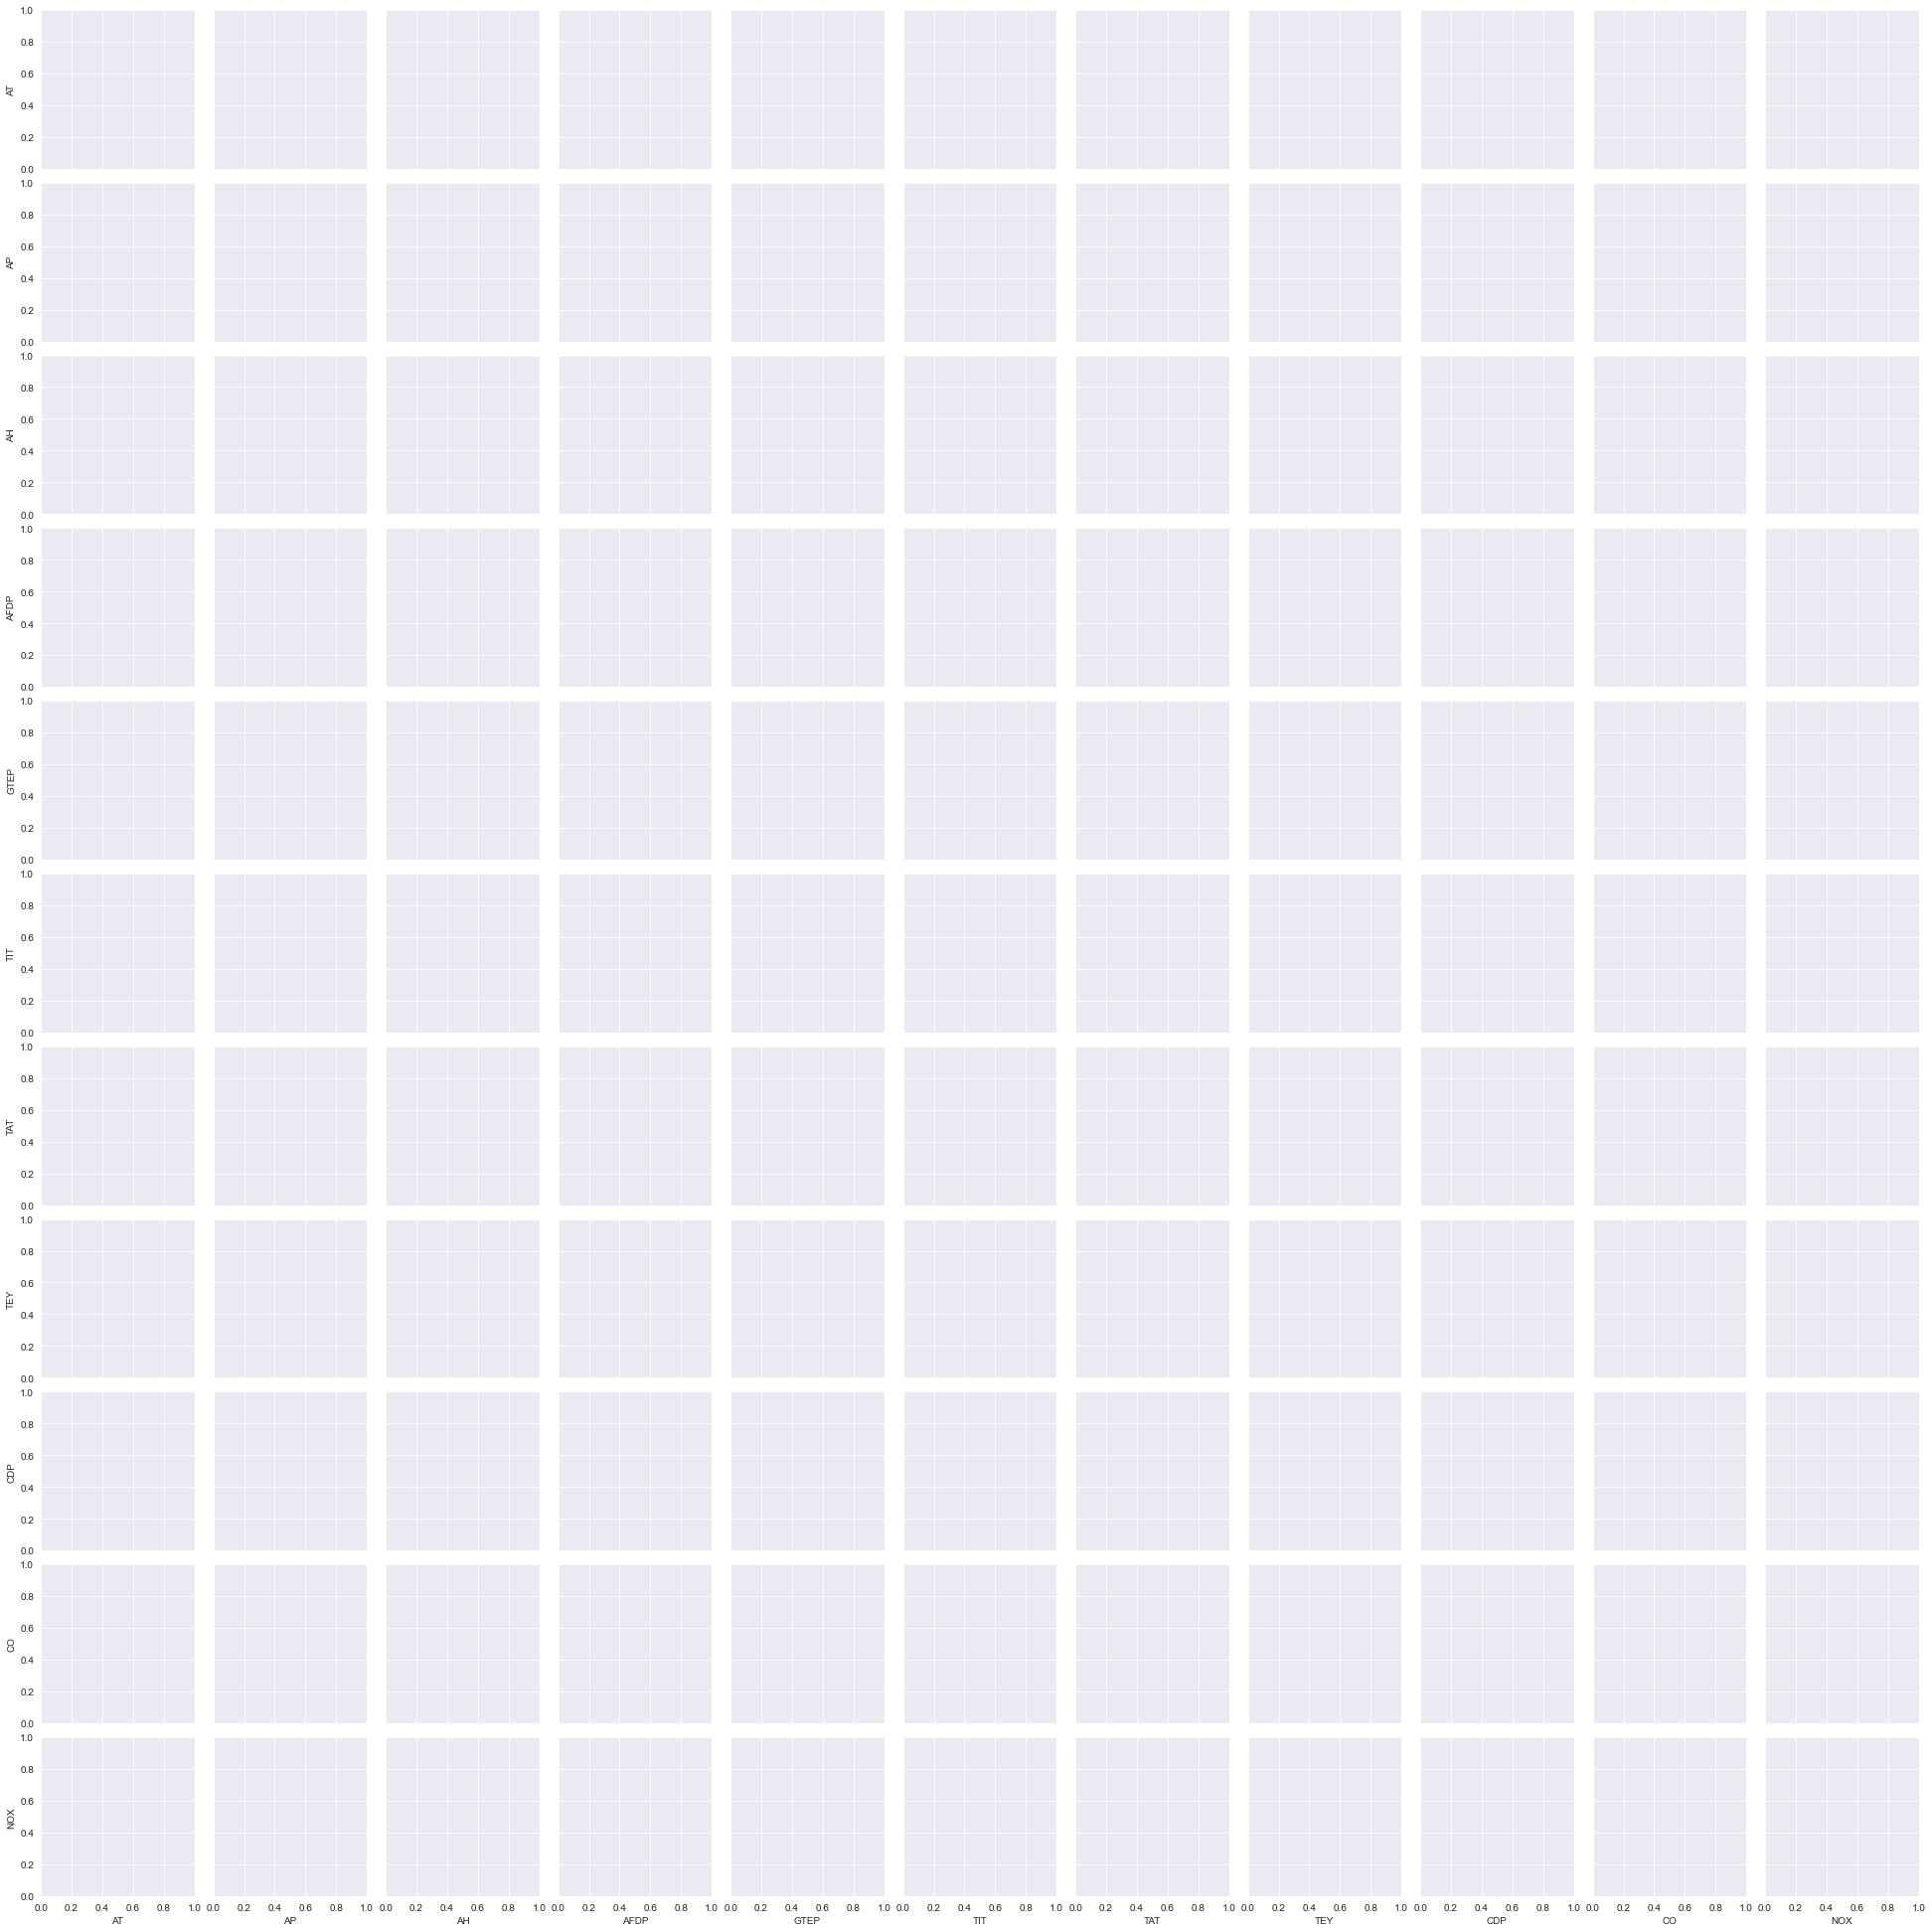

In [18]:
sns.pairplot(df);

* Let's examine the boxplots for the several distributions

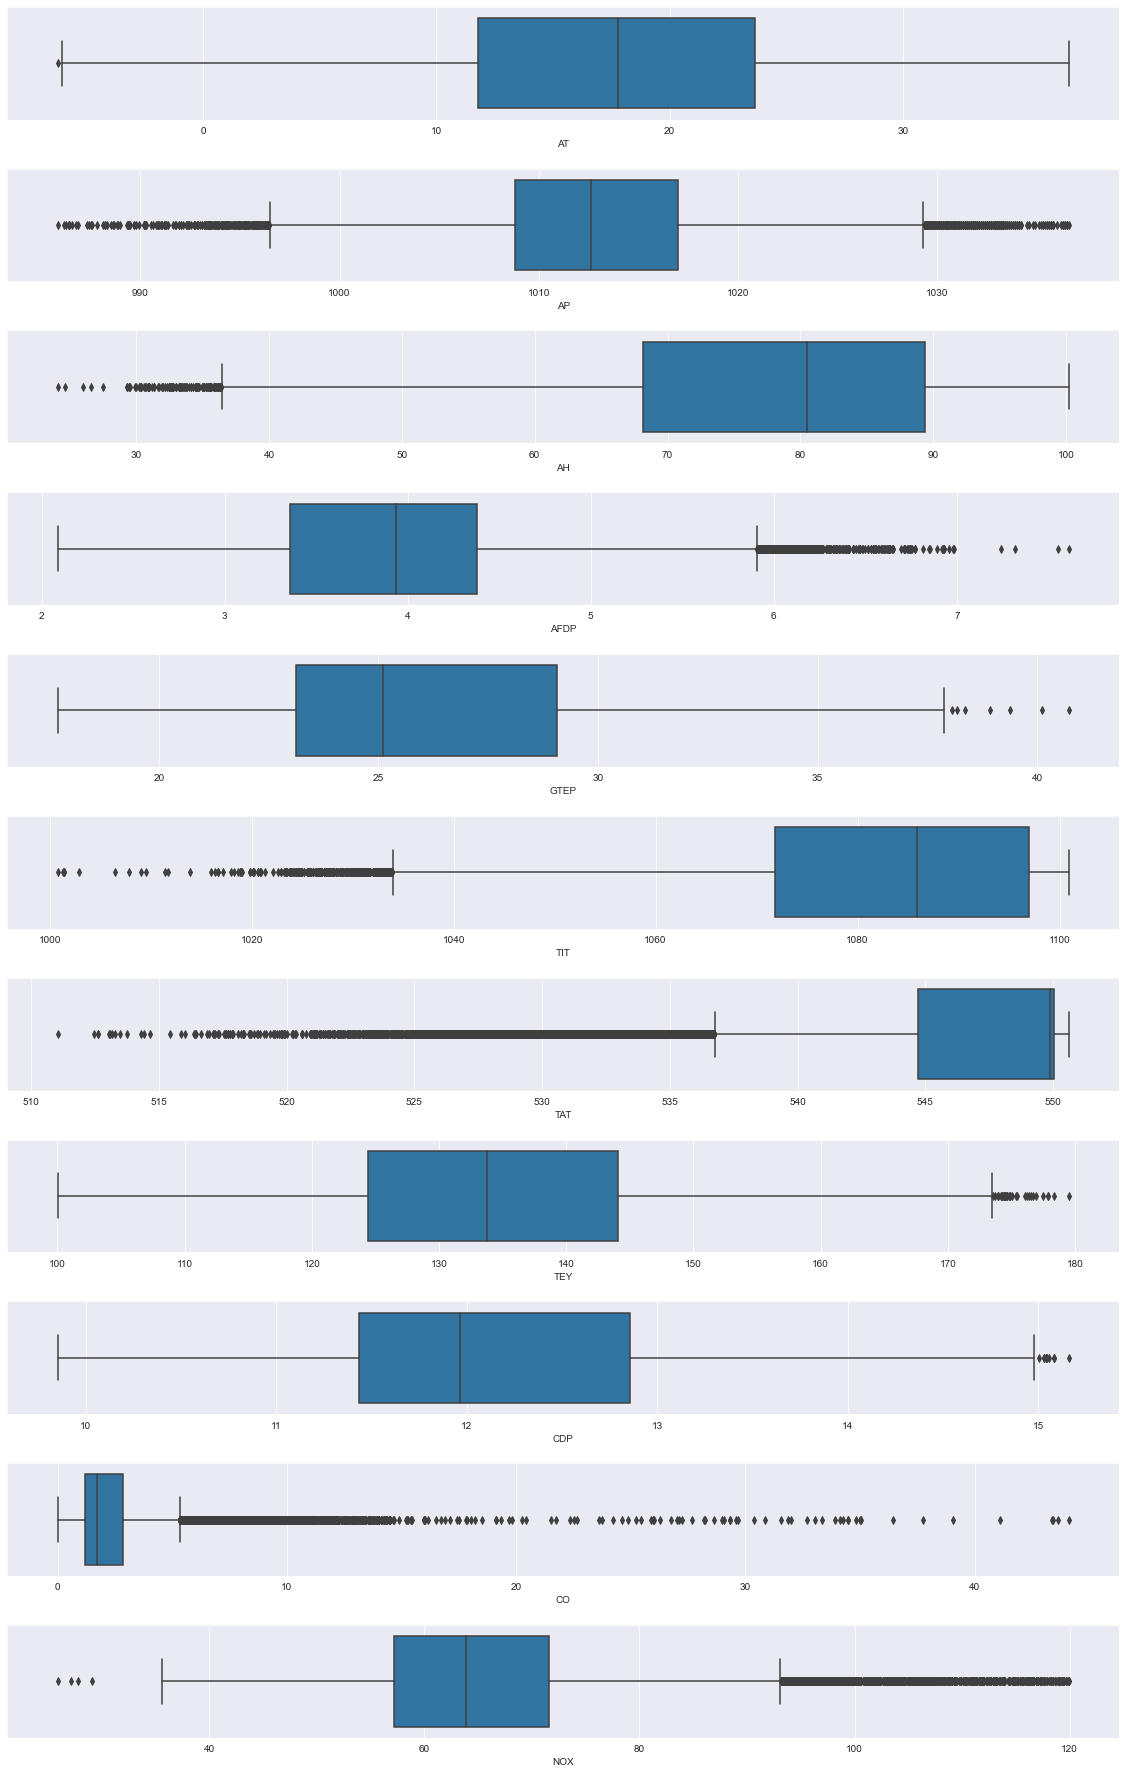

In [20]:
fig, ax=plt.subplots(11,1,figsize=(16,25))
sns.boxplot(x='AT',data=df,ax=ax[0])
sns.boxplot(x='AP',data=df,ax=ax[1])
sns.boxplot(x='AH',data=df,ax=ax[2])
sns.boxplot(x='AFDP',data=df,ax=ax[3])
sns.boxplot(x='GTEP',data=df,ax=ax[4])
sns.boxplot(x='TIT',data=df,ax=ax[5])
sns.boxplot(x='TAT',data=df,ax=ax[6])
sns.boxplot(x='TEY',data=df,ax=ax[7])
sns.boxplot(x='CDP',data=df,ax=ax[8])
sns.boxplot(x='CO',data=df,ax=ax[9])
sns.boxplot(x='NOX',data=df,ax=ax[10]);
plt.tight_layout(pad=2.0)

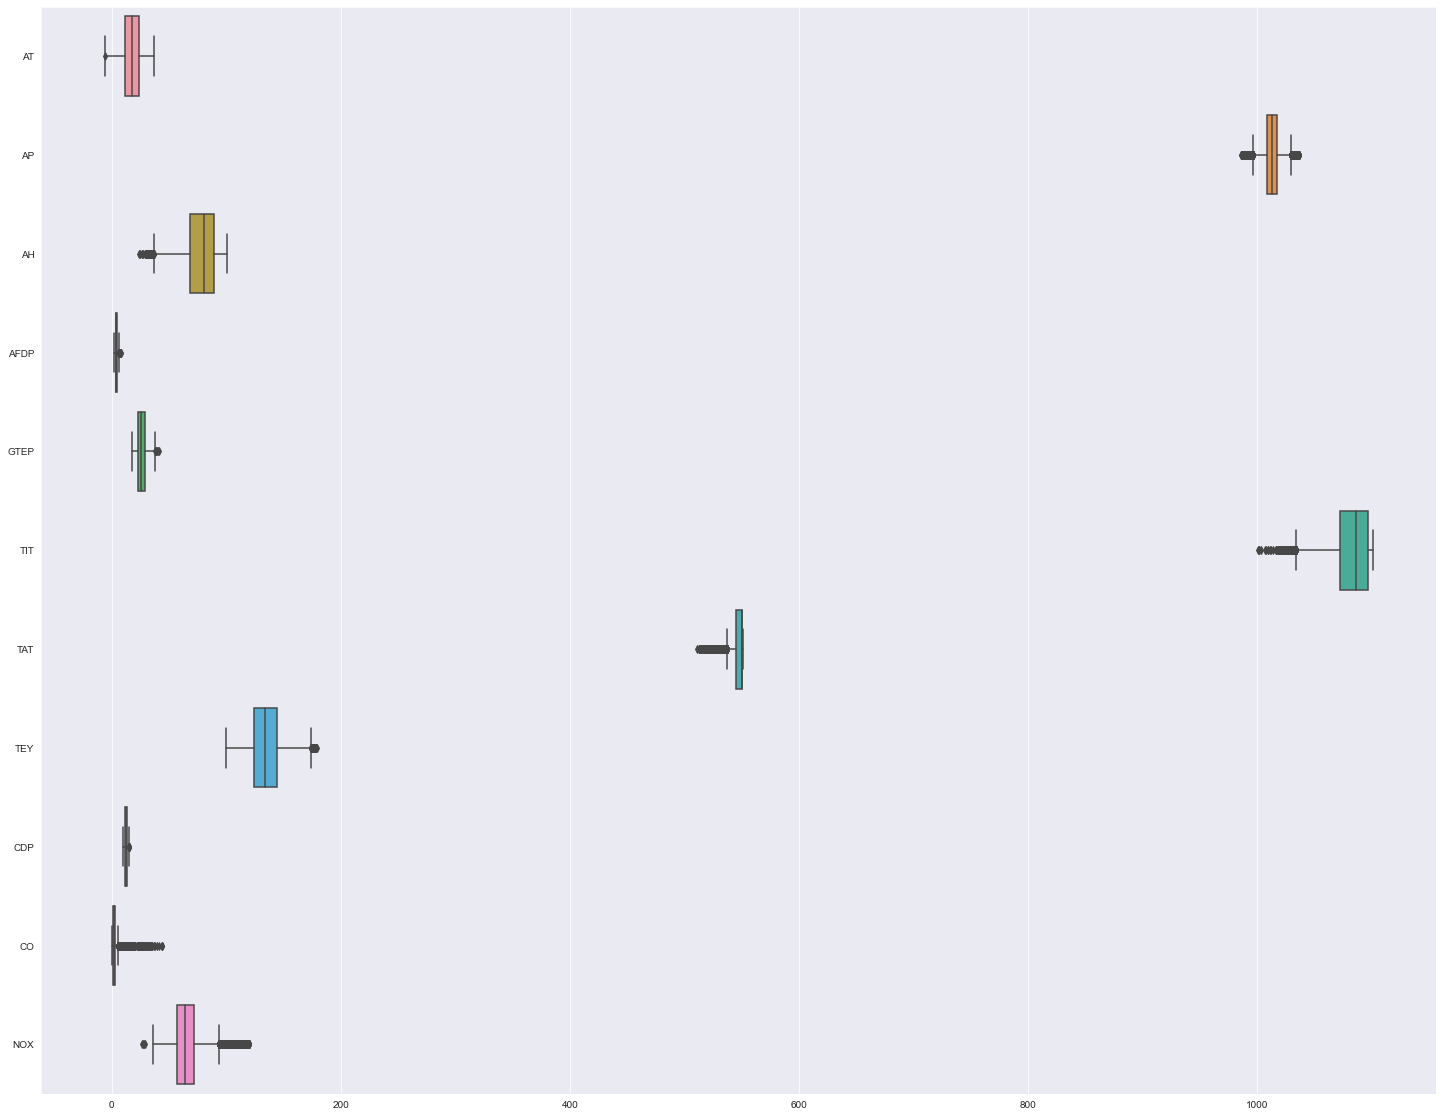

In [21]:
# Outlier
plt.figure(figsize=(25,20))
sns.boxplot(data=df, orient="h");

Mmm hmm! there exists observations with multiple outliers.

### Feature Selection Technique

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [23]:
x=df.drop('TEY', axis=1)
y = df[['TEY']]

In [24]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)
# summarize scores
scores = fit.scores_
features = fit.transform(x)
score = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score.sort_values(by="Score", ascending=False, inplace=True)
score

,Score,Feature
7,1.835721,CDP
4,1.493530,GTEP
5,1.353035,TIT
6,0.777556,TAT
3,0.506922,AFDP
8,0.495114,CO
0,0.323147,AT
9,0.274149,NOX
1,0.126492,AP
2,0.078426,AH


As per features importance CDP, GTEP, TIT, TAT, AFDP, CO these variable are very important to our prediction. IN these variable there is many outlier which is directly impact our performance measure.Values of these features are highly correlated to our target columns, thus all values of features are requried to get best accurcy. So we doesnot requried to handle outlier.

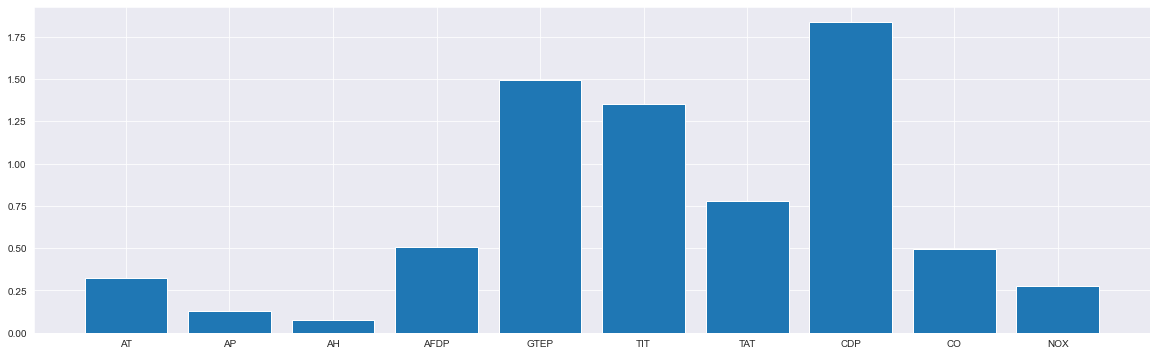

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores,)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(x.columns.values);

***

# Machine Learning Algorithm
Data is ready for algorithm

#### Def Function for all Algorithm

In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn import metrics

In [27]:
def print_score(reg, X_train, y_train, X_test, y_test, train=True,test=True):
    '''
    print the r2_score
    '''
    '''
        training performance
    '''
    print("Train Result:")
    print("mean absolute error: {0:.4f}".format(metrics.mean_absolute_error(y_train, reg.predict(X_train))))
    print("mean squared error: {0:.4f}".format(metrics.mean_squared_error(y_train, reg.predict(X_train))))
    print("RMSE: {0:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, reg.predict(X_train)))))
    print("r2_score: {0:.4f}".format(r2_score(y_train, reg.predict(X_train))))

    '''
    test performance
    '''
    print("Test Result:") 
    print("mean absolute error: {0:.4f}".format(metrics.mean_absolute_error(y_test, reg.predict(X_test))))
    print("mean squared error: {0:.4f}".format(metrics.mean_squared_error(y_test, reg.predict(X_test))))
    print("RMSE: {0:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test)))))
    print("r2_score: {0:.4f}\n".format(r2_score(y_test, reg.predict(X_test))))
    
    print("r2_Score after Cross Validation\n")
    
    '''
    Cross Validation
    '''
    folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores_train = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds_train)
    print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
    
    folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores_test = cross_val_score(reg, X_test, y_test, scoring='r2', cv=folds_test)
    print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))
    
        

### Simple Regression

In [28]:
# selection of x(independent variables) and y(Dependent variables)
X=df[['CDP']].values.reshape(-1,1)
y=df['TEY']

In [29]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)

In [30]:
# spliting data the into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(std,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
simple=LinearRegression()
simple.fit(X_train,y_train)
y_train_pred=simple.predict(X_train)
y_test_pred=simple.predict(X_test)
from sklearn import metrics
print('r2_score of  Multiple Regression Training  =',metrics.r2_score(y_train,y_train_pred))
print('r2_score of  Multiple Regression Testing =',metrics.r2_score(y_test,y_test_pred))

r2_score of  Multiple Regression Training  = 0.9778139220147096
r2_score of  Multiple Regression Testing = 0.9771491118632684


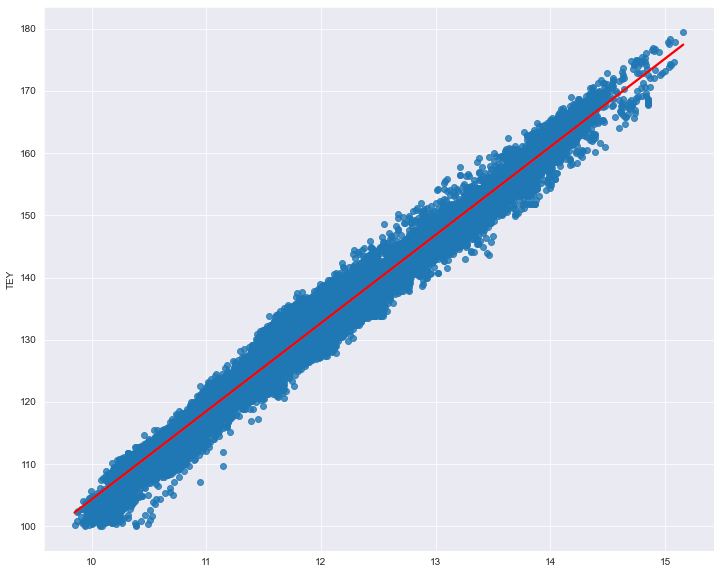

In [32]:
plt.figure(figsize=(12,10));
sns.regplot(X,y, line_kws={"color": "red"});
plt.show();

In [33]:
print('Simple Linear Regression:\n')
print_score(simple, X_train, y_train, X_test, y_test, train=True,test=True)

Simple Linear Regression:

Train Result:
mean absolute error: 1.8962
mean squared error: 5.4131
RMSE: 2.3266
r2_score: 0.9778
Test Result:
mean absolute error: 1.9235
mean squared error: 5.5690
RMSE: 2.3599
r2_score: 0.9771

r2_Score after Cross Validation

Training r2_score: 	 0.9778
Testing r2_score: 	 0.9771


selection of x(independent variables) and y(Dependent variables) for all other algorithm

In [34]:
# selection of x(independent variables) and y(Dependent variables)
X=df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT']]
y = df["TEY"]

In [35]:
X.shape

(36733, 7)

In [36]:
y.shape

(36733,)

##### Applying Standard Scaler
* For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
* x_scaled = x – mean/std_dev
* However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [37]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(X)

##### Train Test Split : 
* To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

In [38]:
# spliting data the into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(std,y,test_size=0.2,random_state=42)

***

### Multiple Regression

In [39]:
from sklearn.linear_model import LinearRegression
lrg=LinearRegression()
lrg.fit(X_train,y_train)

LinearRegression()

In [40]:
print("Multiple Regression:\n")
print_score(lrg, X_train, y_train, X_test, y_test, train=True,test=True)

Multiple Regression:

Train Result:
mean absolute error: 0.7945
mean squared error: 1.0342
RMSE: 1.0170
r2_score: 0.9958
Test Result:
mean absolute error: 0.8032
mean squared error: 1.0451
RMSE: 1.0223
r2_score: 0.9957

r2_Score after Cross Validation

Training r2_score: 	 0.9958
Testing r2_score: 	 0.9957


***

### Decision tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=2)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [42]:
print("Decision tree Regression:\n")
print_score(DTR, X_train, y_train, X_test, y_test, train=True,test=True)

Decision tree Regression:

Train Result:
mean absolute error: 2.9457
mean squared error: 15.5707
RMSE: 3.9460
r2_score: 0.9362
Test Result:
mean absolute error: 3.0319
mean squared error: 16.6333
RMSE: 4.0784
r2_score: 0.9317

r2_Score after Cross Validation

Training r2_score: 	 0.9357
Testing r2_score: 	 0.9317


***

### Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100)
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
print("Random Forest Regression:\n")
print_score(RFR, X_train, y_train, X_test, y_test, train=True,test=True)

Random Forest Regression:

Train Result:
mean absolute error: 0.1693
mean squared error: 0.0591
RMSE: 0.2431
r2_score: 0.9998
Test Result:
mean absolute error: 0.4606
mean squared error: 0.4214
RMSE: 0.6492
r2_score: 0.9983

r2_Score after Cross Validation

Training r2_score: 	 0.9982
Testing r2_score: 	 0.9973


# K-Nearest Neighbor(KNN)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [46]:
print("K-Nearest Neighbor Regression:\n")
print_score(knn, X_train, y_train, X_test, y_test, train=True,test=True)

K-Nearest Neighbor Regression:

Train Result:
mean absolute error: 0.4436
mean squared error: 0.4561
RMSE: 0.6754
r2_score: 0.9981
Test Result:
mean absolute error: 0.5588
mean squared error: 0.7039
RMSE: 0.8390
r2_score: 0.9971

r2_Score after Cross Validation

Training r2_score: 	 0.9968
Testing r2_score: 	 0.9943


***

### Support Vector Regression

In [47]:
from sklearn.svm import SVR
SVR=SVR()
SVR.fit(X_train,y_train)

SVR()

In [48]:
print("Support Vector Regression:\n")
print_score(SVR, X_train, y_train, X_test, y_test, train=True,test=True)

Support Vector Regression:

Train Result:
mean absolute error: 0.6081
mean squared error: 1.0399
RMSE: 1.0197
r2_score: 0.9957
Test Result:
mean absolute error: 0.6286
mean squared error: 1.2160
RMSE: 1.1027
r2_score: 0.9950

r2_Score after Cross Validation

Training r2_score: 	 0.9950
Testing r2_score: 	 0.9894


***

# Ensemble techniques

### Bagging/Bootstrap aggrigation

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg_Bag=BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,bootstrap=True,random_state=42)
bag_reg_Bag.fit(X_train,y_train)
print("Bagging/Bootstrap aggrigation:\n")
print_score(bag_reg_Bag, X_train, y_train, X_test, y_test, train=True,test=True)

Bagging/Bootstrap aggrigation:

Train Result:
mean absolute error: 0.1664
mean squared error: 0.0565
RMSE: 0.2376
r2_score: 0.9998
Test Result:
mean absolute error: 0.4573
mean squared error: 0.4175
RMSE: 0.6461
r2_score: 0.9983

r2_Score after Cross Validation



***

### pasting

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg_past=BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,bootstrap=False,random_state=42)
bag_reg_past.fit(X_train,y_train)
print("Pasting:\n")
print_score(bag_reg_past, X_train, y_train, X_test, y_test, train=True,test=True)

***

### Adaboosta

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor(random_state=42)
adaboost.fit(X_train,y_train)
print("Adaboosta:\n")
print_score(adaboost, X_train, y_train, X_test, y_test, train=True,test=True)

***

### Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor(random_state=40,learning_rate=0.1)
grad_reg.fit(X_train,y_train)
print("Gradient boosting:\n")
print_score(grad_reg, X_train, y_train, X_test, y_test, train=True,test=True)

***

### xgboost Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb_reg=XGBRegressor(random_state=42,learning_rate=0.1)
xgb_reg.fit(X_train,y_train)
print("xgboost classifier:\n")
print_score(xgb_reg, X_train, y_train, X_test, y_test, train=True,test=True)

***

|Regression| Simple Linear | Multiple |Decision tree | Random Forest |KNN |SVM | Bagging | Adaboosta | Gradient Boosting | xgboost Regressor|
|:-|:-|:- |:- |:- |:- |:-|:-| :- |:-|:-|
| Training r2_score | 0.9778 | 0.9958 | 0.9357 | 0.9982 |0.9825 |0.9950 | 0.9964 | 0.9851 | 0.9964 |0.9977|
| Testing r2_score | 0.9771 | 0.9957 | 0.9317 | 0.9973 |0.9814 |0.9894 | 0.9949 | 0.9835 | 0.9962 |0.9971|

### Observations:
* We got pretty good results for all model but it that Random forest is the best model.
* Train and test errors are also quiet similar, which means our model is not overfitted or underfitted.

***

#### Predicting values from Model using same dataset

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': RFR.predict(X_test)})
mlr_diff.head(10)

#### The Scatterplot of Relationship between Actual Values and Predictions

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(mlr_diff['Actual value'], mlr_diff['Predicted value']);
     

#### predictions for new Data

In [ ]:
# generating predictions for new Data
l=[(11,20,1111,560,3.5,12,4)]
i=np.array(l)
y_pred = RFR.predict(i)
# creating table with test & predicted for test
print('predictions for new Data :',y_pred)

*** ♡ Thank you for taking the time ♡ ***